#### To use BF2PALM, please run
```
pip install BF2PALM
```

### BF2PALM requires 5 python packages:

#### For preprocessing subpackages:

1. **osmnx** to download the BF data from OSM - can be *removed* by developing our own download module
2. **shapely** to detect whether a point fall within/ intersect with the selected bbox
3. **pandas** to decode the geopandas/geojason file format to an array of vertex
4. **numpy** to operate on array

#### In addtion, for postprocessing subpackages:

1. **netCDF4** to load data from output of PALM
2. **scipy** to save data in *.mat* format and do interpolation for vertical velocity to shift a half vertical grid from *zw_3d* to *zu_3d*

###  BF2PALM provides the following features
1. **Edge detection** automatically detect windward and leeward face for pressure deficit evaluation
2. **Rasterization from OSM or other BF data source or any vectorial form (*.obj, *.geojson)** with resolution, building height (an array or a constant) and bounding box as input.
- Raster with uniform height
- Raster with realistic height (BF data has to have building height information)
3. **Rotation(with dealiasing) and trimming** to fit parallelzation requirements
4. **Calculate some geometrical parameters** from the rastered map and vecterial edge, with great potential to extend to other parameters.
5. **Small structures elimination/merge** to large its adjacent
6. **Postprocess** 3D field data directly from PALM output

In [1]:
from BF2PALM import extractDomainOSM
from BF2PALM import rotate
from BF2PALM import showDiagram
import matplotlib.pyplot as plt
import numpy as np

### Below we provide an example - it should be run very fast ~ 10-15 seconds

### Step 1: Set bounding box for the neighborhood
1. Draw the bbox from Google Earth from urban area
2. Change the coordinates to the following format (need to be clockwise/anti-clockwise)

![jupyter](./exampleCor.jpg)

In [10]:
bbox = [["38°50'41.01\"N", "76°57'39.45\"W"], ## pp1
["38°50'34.93\"N", "76°57'48.69\"W"], ## pp2
["38°50'28.40\"N", "76°57'41.24\"W"], ## pp3
["38°50'34.11\"N", "76°57'31.79\"W"]] ## pp4

### Resolution  $\Delta x$ = $\Delta y$ = $1m$

In [11]:
res = 1

### Step 2: Rasterization
Input: Bounding box / resolution / building height  
Output: Rastered domain / angle of every building edge / length of every edge / Normalized entropy / Averaged building size

Merged two angle data
$\phi=$0.5374760172478658
(412, 394)


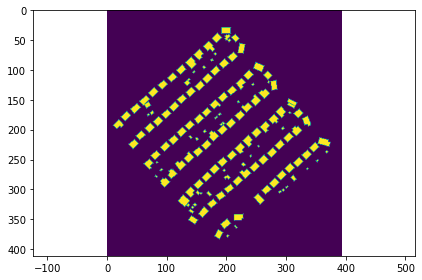

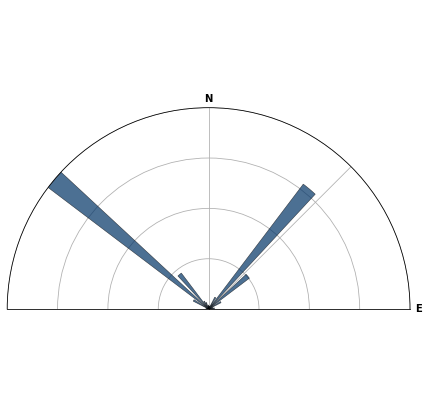

In [12]:
[domain,angle,weighted,phi,area]  = extractDomainOSM(bbox,res,16)

### Step 3: Rotation the domain to left the main street align with the virtual-x direction

/Users/jiachenlu/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


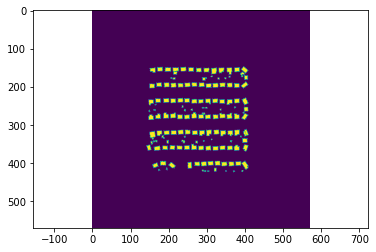

In [13]:

tmp = domain
angleRotate = 41
cc = rotate(tmp,angleRotate)

### Step 4: Trim the domain for parallelization - edit the npex and npey will give sugguestions about nearest option

/Users/jiachenlu/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now (290, 275)


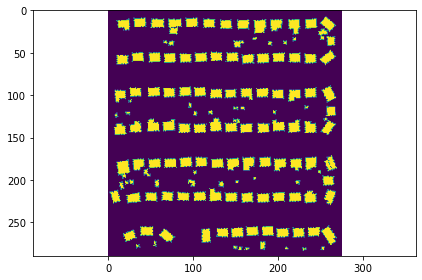

In [32]:
domain = cc[140:430,140:415]
plt.imshow(domain)
plt.axis('equal')

print('Now '+str(domain.shape))
# Find out all possible combination of the computational domain shape

def trimming(npex,npey): # Ask for define - give suggestions - plot for each suggestions - 
    
    nz = 128 # should not be hard coded.
    # 48 cores set up
    npex = 8 # Core in x direction
    npey = 6

    for x in range(domain.shape[0]-30,domain.shape[0]+30):
        for y in range(domain.shape[1]-30,domain.shape[1]+30):
            if nz % npex == 0:
                if x % npex == 0 and y % npex == 0:
                    if x % npey == 0 and  y % npey == 0:
                        print(str(x),str(y))

                    

#t = 0
#for x in range(domain.shape[0]):
#    for y in range(domain.shape[1]):
#        if domain[x,y] == 0:
#            t+=1
            

#lf = cal_lf(nn,res)            
#lp = 1-t/nn.shape[0]/nn.shape[1]
#print(lp)

plt.tight_layout()
plt.savefig('rotationTrimming.png',dpi=300)

### Step 6: Draw a diagram for details of the rastered domain

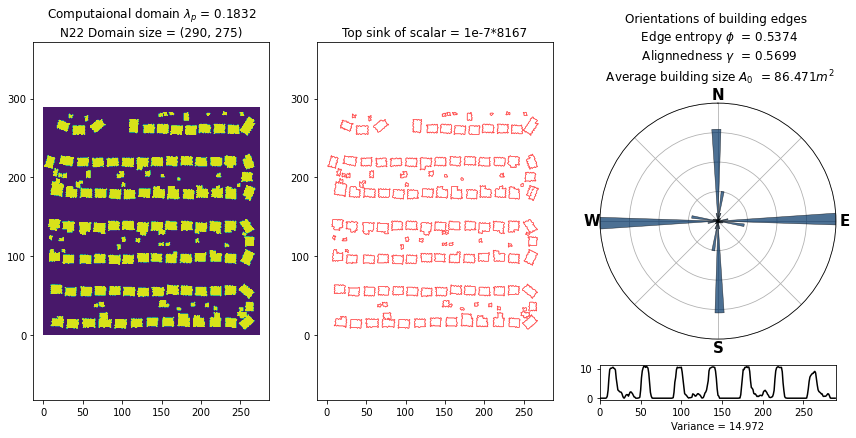

In [33]:
showDiagram(domain,angle,weighted,phi,area,angleRotate,'','N22')